In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)


In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

620

In [5]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1e2c577390ee958d44c0e4736f18a65e


In [7]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")





Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | naze
Processing Record 2 of Set 1 | ignalina
Processing Record 3 of Set 1 | quang ngai
Processing Record 4 of Set 1 | sahbuz
Processing Record 5 of Set 1 | pevek
Processing Record 6 of Set 1 | takoradi
Processing Record 7 of Set 1 | geraldton
Processing Record 8 of Set 1 | marcona
City not found. Skipping...
Processing Record 9 of Set 1 | punta arenas
Processing Record 10 of Set 1 | tasiilaq
Processing Record 11 of Set 1 | grand gaube
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | kruisfontein
Processing Record 14 of Set 1 | tuktoyaktuk
Processing Record 15 of Set 1 | bethel
Processing Record 16 of Set 1 | upernavik
Processing Record 17 of Set 1 | kuryk
Processing Record 18 of Set 1 | borogontsy
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | qaanaaq
Processing Record 21 of Set 1 | buala
Processing Record 22 of Set 1 | georgetown
Processing Record 2

Processing Record 39 of Set 4 | kangalassy
Processing Record 40 of Set 4 | torbay
Processing Record 41 of Set 4 | singkang
Processing Record 42 of Set 4 | warqla
City not found. Skipping...
Processing Record 43 of Set 4 | leningradskiy
Processing Record 44 of Set 4 | tazovskiy
Processing Record 45 of Set 4 | poum
Processing Record 46 of Set 4 | nikolskoye
Processing Record 47 of Set 4 | rio grande
Processing Record 48 of Set 4 | ahipara
Processing Record 49 of Set 4 | thompson
Processing Record 50 of Set 4 | lewisville
Processing Record 1 of Set 5 | aksu
Processing Record 2 of Set 5 | turukhansk
Processing Record 3 of Set 5 | hobart
Processing Record 4 of Set 5 | vanavara
Processing Record 5 of Set 5 | tomatlan
Processing Record 6 of Set 5 | mitu
Processing Record 7 of Set 5 | east london
Processing Record 8 of Set 5 | allingabro
Processing Record 9 of Set 5 | amparafaravola
Processing Record 10 of Set 5 | puerto del rosario
Processing Record 11 of Set 5 | sorong
Processing Record 12 o

City not found. Skipping...
Processing Record 27 of Set 8 | tiksi
Processing Record 28 of Set 8 | wum
Processing Record 29 of Set 8 | djibo
Processing Record 30 of Set 8 | gizo
Processing Record 31 of Set 8 | norfolk
Processing Record 32 of Set 8 | upington
Processing Record 33 of Set 8 | borovoy
Processing Record 34 of Set 8 | ciortesti
Processing Record 35 of Set 8 | kologriv
Processing Record 36 of Set 8 | utiroa
City not found. Skipping...
Processing Record 37 of Set 8 | sehithwa
Processing Record 38 of Set 8 | xai-xai
Processing Record 39 of Set 8 | salamiyah
Processing Record 40 of Set 8 | erdenet
Processing Record 41 of Set 8 | la ronge
Processing Record 42 of Set 8 | sakakah
Processing Record 43 of Set 8 | arlit
Processing Record 44 of Set 8 | ternate
Processing Record 45 of Set 8 | abu dhabi
Processing Record 46 of Set 8 | puerto carreno
Processing Record 47 of Set 8 | thaba-tseka
Processing Record 48 of Set 8 | duobao
Processing Record 49 of Set 8 | talaya
Processing Record 5

Processing Record 14 of Set 12 | alamogordo
Processing Record 15 of Set 12 | wagar
Processing Record 16 of Set 12 | berlevag
Processing Record 17 of Set 12 | thinadhoo
Processing Record 18 of Set 12 | matara
Processing Record 19 of Set 12 | pangnirtung
Processing Record 20 of Set 12 | barguzin
Processing Record 21 of Set 12 | brae
Processing Record 22 of Set 12 | jose bonifacio
Processing Record 23 of Set 12 | mecca
Processing Record 24 of Set 12 | the valley
Processing Record 25 of Set 12 | armacao dos buzios
City not found. Skipping...
Processing Record 26 of Set 12 | partizanskoye
Processing Record 27 of Set 12 | bababe
City not found. Skipping...
Processing Record 28 of Set 12 | poso
Processing Record 29 of Set 12 | labytnangi
Processing Record 30 of Set 12 | tadine
Processing Record 31 of Set 12 | antsohihy
Processing Record 32 of Set 12 | barra do garcas
Processing Record 33 of Set 12 | mullaitivu
City not found. Skipping...
Processing Record 34 of Set 12 | lloydminster
Processin

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Naze,28.3667,129.4833,56.32,59,100,4.76,JP,2022-02-07 02:51:22
1,Ignalina,55.3500,26.1667,32.83,97,100,14.18,LT,2022-02-07 02:52:11
2,Quang Ngai,15.1167,108.8000,77.77,77,73,1.95,VN,2022-02-07 02:52:12
3,Sahbuz,39.4072,45.5739,19.00,68,47,4.45,AZ,2022-02-07 02:52:12
4,Pevek,69.7008,170.3133,-23.37,98,27,0.92,RU,2022-02-07 02:52:13
5,Takoradi,4.8845,-1.7554,78.87,86,100,5.26,GH,2022-02-07 02:52:13
6,Geraldton,-28.7667,114.6000,77.41,33,40,14.97,AU,2022-02-07 02:50:21
7,Punta Arenas,-53.1500,-70.9167,53.71,82,75,6.91,CL,2022-02-07 02:52:14
8,Tasiilaq,65.6145,-37.6368,23.16,53,100,60.31,GL,2022-02-07 02:48:43
9,Grand Gaube,-20.0064,57.6608,77.40,86,100,4.00,MU,2022-02-07 02:52:15


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

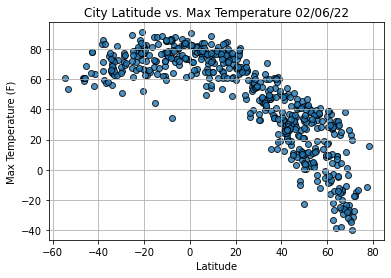

In [13]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

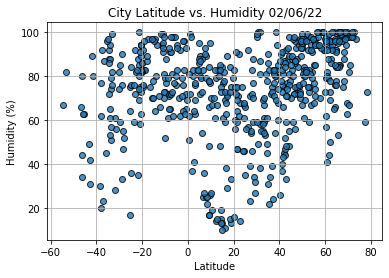

In [14]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

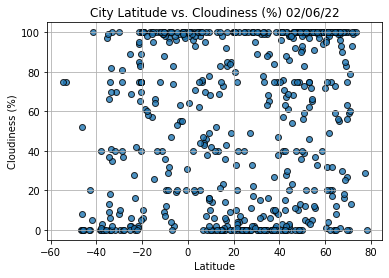

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

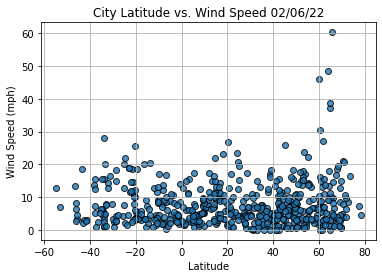

In [16]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()